#### **6-5. SVM (Support Vector Machine)**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv')
c.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


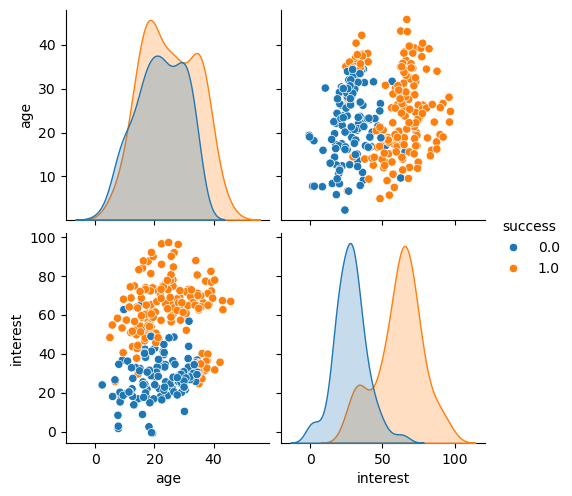

In [43]:
sns.pairplot (hue='success', data=c)

In [44]:
from sklearn.model_selection import train_test_split

x = c[['age','interest']]
y = c['success']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(207, 2) (90, 2) (207,) (90,)


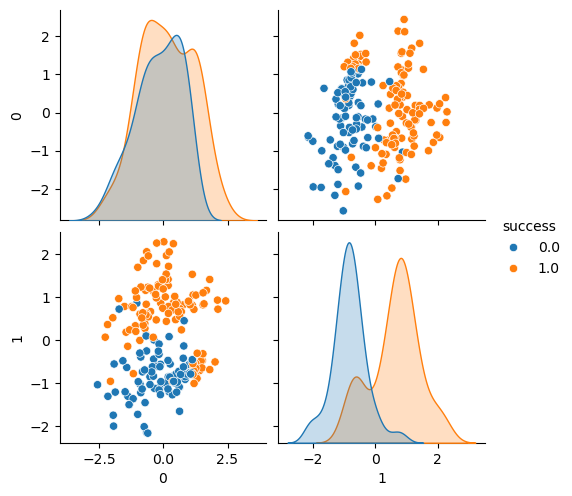

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)

data=pd.concat([pd.DataFrame(x_train),y_train.reset_index(drop=True)],axis=1)
sns.pairplot(hue='success',data=data)

In [46]:
from sklearn.svm import SVC

clf=SVC(C=0.5, random_state=45)
clf.fit (x_train, y_train)

SVC(C=0.5, random_state=45)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
x_test_scaled = scaler.transform (x_test)
pred = clf.predict(x_test_scaled)

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))
print('정밀도: %.2f%%' %(precision_score (y_test, pred)*100))
print('재현율: %.2f%%' %(recall_score (y_test, pred)*100))
print('F1: %.2f%%' %(f1_score (y_test, pred)*100))

[[37  2]
 [ 2 49]]
정확도: 95.56%
정밀도: 96.08%
재현율: 96.08%
F1: 96.08%


C:\Users\sunwa\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


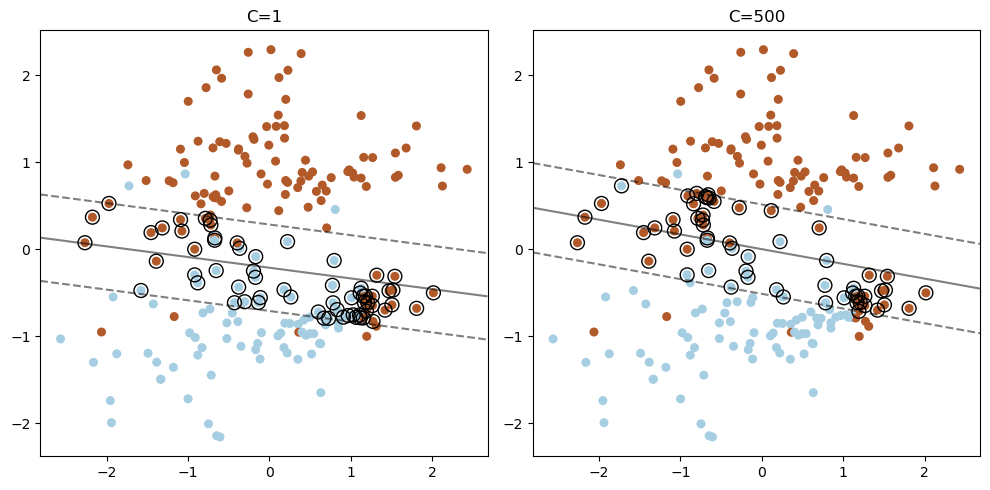

In [80]:
from sklearn.svm import LinearSVC

plt.figure(figsize=(10,5))
for i, C in enumerate([1,500]):
    clf=LinearSVC (C=C, loss='hinge', random_state=42).fit(x_train, y_train)
    decision_function = clf.decision_function(x_train)
    support_vector_indices = np.where(np.abs(decision_function)<=1+1e-15)[0]
    support_vectors = x_train[support_vector_indices]

    plt.subplot(1,2,i+1)
    plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=30, cmap=plt.cm.Paired)
    plt.scatter(support_vectors[:,0],support_vectors[:,1],s=100,linewidth=1,edgecolors='k',facecolors='none')
    
    ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0],xlim[1],50),np.linspace(ylim[0],ylim[1],50))
    Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contour(xx,yy,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    plt.title('C='+str(C))
plt.tight_layout()
plt.show()

#### **6-5-1. SVR (SVM 활용한 회귀분석)**

In [115]:
import numpy as np
x = np.sort(5*np.random.rand(40,1), axis=0)
y = np.sin(x).ravel()

print(x[0:6],'\n\n', y[0:11])

[[0.09980336]
 [0.12577665]
 [0.26307419]
 [0.33494599]
 [0.37224906]
 [0.44469365]] 

 [0.09963776 0.12544529 0.2600502  0.32871816 0.36371137 0.43018135
 0.80291793 0.97546936 0.96146712 0.90007399 0.89234988]


In [116]:
y[::5]+=3*(0.5-np.random.rand(8))
print(y[0:11])

[0.20064347 0.12544529 0.2600502  0.32871816 0.36371137 0.18680316
 0.80291793 0.97546936 0.96146712 0.90007399 2.36566412]


In [117]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Random Forest
svr_lin = SVR(kernel='linear', C=100, gamma='auto')  
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(x,y)
svr_lin.fit(x,y)
svr_poly.fit(x,y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [118]:
rbf_pred=svr_rbf.predict(x)
lin_pred=svr_lin.predict(x)
poly_pred=svr_poly.predict(x)

from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random Forest','Linear','Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame (index=kernel, columns=evls)

for pred, nm in zip(preds,kernel):
    mse=mean_squared_error(y,pred)
    rmse=np.sqrt(mean_squared_error(y,pred))
    mae=mean_absolute_error(y,pred)

    results.loc[nm, 'mse']=round(mse,2)
    results.loc[nm, 'rmse']=round(rmse,2)
    results.loc[nm, 'mae']=round(mae,2)

results

,mse,rmse,mae
Random Forest,0.15,0.39,0.19
Linear,0.43,0.65,0.45
Polynomial,0.17,0.41,0.2


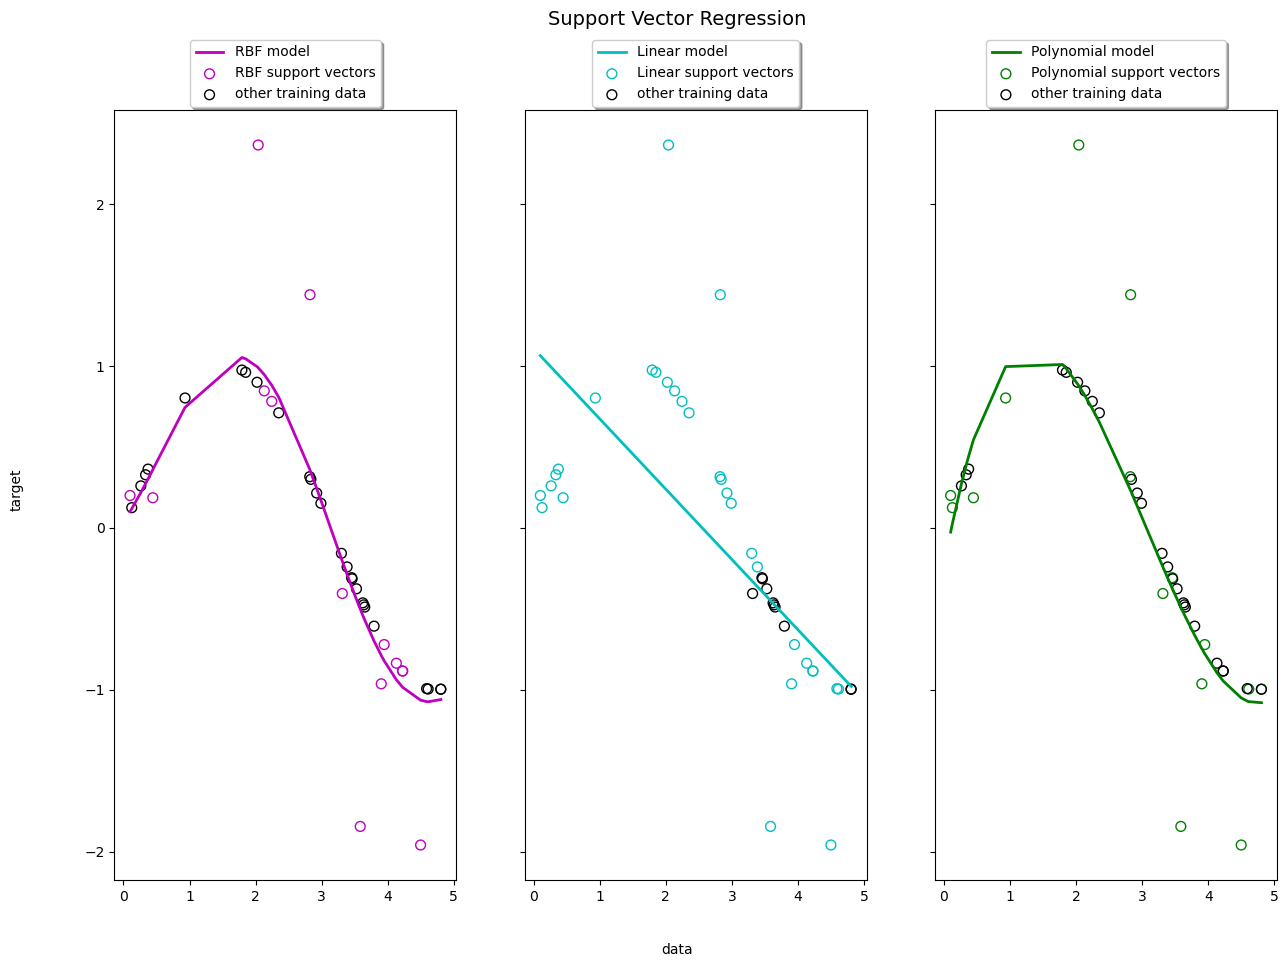

In [121]:
lw=2

svrs=[svr_rbf,svr_lin,svr_poly]
kernel_label=['RBF','Linear','Polynomial']
model_color=['m','c','g']

fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(15,10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(x,svr.fit(x,y).predict(x),color=model_color[ix],lw=lw,label="{} model".format(kernel_label[ix]))
    axes[ix].scatter(x[svr.support_],y[svr.support_],facecolor='none',edgecolor=model_color[ix],s=50,label="{} support vectors".format(kernel_label[ix]))
    axes[ix].scatter(x[np.setdiff1d(np.arange(len(x)),svr.support_)],y[np.setdiff1d(np.arange(len(x)),svr.support_)],facecolor='none',edgecolor='k',s=50,label='other training data')
    axes[ix].legend(loc='upper center',bbox_to_anchor=(0.5,1.1),ncol=1,fancybox=True,shadow=True)

fig.text(0.5,0.04,'data',ha='center',va='center')
fig.text(0.06,0.5,'target',ha='center',va='center', rotation='vertical')
fig.suptitle('Support Vector Regression', fontsize=14)
plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

liver=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/indian_liver_patient.csv')
print(type(liver))
print(liver['Dataset'].unique())
print(liver.Dataset.unique())
liver.head()

<class 'pandas.core.frame.DataFrame'>
[1 2]
[1 2]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
liver.Dataset = np.where(liver.Dataset==2,0,1)
liver.Gender = np.where(liver.Gender=='Female',0,1)
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
liver.dropna(axis=0, inplace=True)
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

x = liver.iloc[:,:-1]
y = liver['Dataset']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(405, 10) (174, 10) (405,) (174,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier (n_neighbors=15, weights = 'uniform')
clf.fit (x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred = clf.predict(x_test)

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))
print('정밀도: %.2f%%' %(precision_score (y_test, pred)*100))
print('재현율: %.2f%%' %(recall_score (y_test, pred)*100))
print('F1: %.2f%%' %(f1_score (y_test, pred)*100))

[[14 36]
 [27 97]]
정확도: 63.79%
정밀도: 72.93%
재현율: 78.23%
F1: 75.49%


In [19]:
import numpy as np

np.random.seed(0)
x = np.sort(5*np.random.rand(400,1), axis=0)
t = np.linspace(0,5,500)[:,np.newaxis]
y = np.sin(x).ravel()

print(x[:10])
print(y[:10])
print(t[:10])

[[0.02347738]
 [0.05713729]
 [0.05857042]
 [0.06618429]
 [0.08164251]
 [0.08214815]
 [0.09260897]
 [0.093949  ]
 [0.09596599]
 [0.10053773]]
[0.02347522 0.05710621 0.05853694 0.06613598 0.08155185 0.08205579
 0.09247665 0.09381086 0.09581876 0.10036845]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]
 [0.0501002 ]
 [0.06012024]
 [0.07014028]
 [0.08016032]
 [0.09018036]]


In [21]:
y[::1]+=1*(0.5-np.random.rand(400))
print(y[0:10])

[ 0.48348242 -0.0825989   0.15023403  0.18872941 -0.22781313 -0.12697967
 -0.36185716  0.24187462 -0.301724   -0.16959874]


In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor (n_neighbors=20, weights = 'uniform')
knn_dis = KNeighborsRegressor (n_neighbors=20, weights = 'distance')

knn_uni.fit (x_train, y_train)
knn_dis.fit (x_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [24]:
knn_uni_pred=knn_uni.predict(x_test)
knn_dis_pred=knn_dis.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [knn_uni_pred, knn_dis_pred]
weights = ['Uniform','Distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame (index=weights, columns=evls)

for pred, nm in zip(preds,weights):
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    mae=mean_absolute_error(y_test,pred)

    results.loc[nm, 'mse']=round(mse,2)
    results.loc[nm, 'rmse']=round(rmse,2)
    results.loc[nm, 'mae']=round(mae,2)

results

,mse,rmse,mae
Uniform,0.11,0.32,0.28
Distance,0.13,0.35,0.31


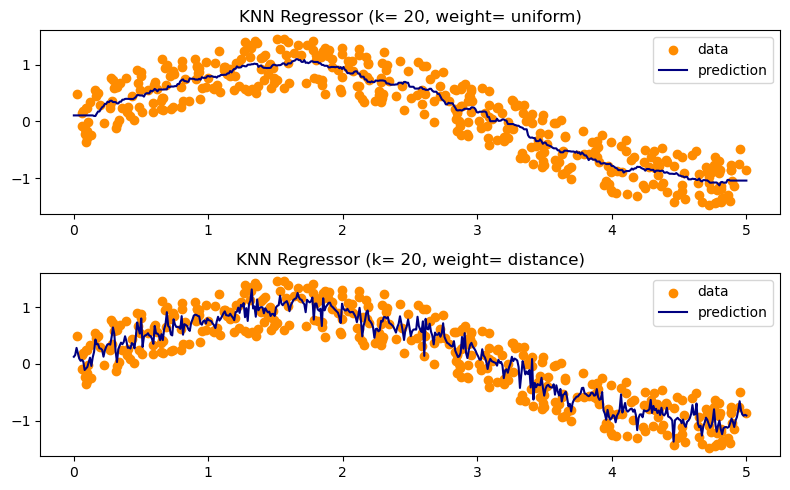

In [31]:
plt.figure(figsize=(8,5))

for i, weights in enumerate(['uniform','distance']):
    knn=KNeighborsRegressor (n_neighbors=20, weights = weights)

    y_=knn.fit(x,y).predict(t)

    plt.subplot(2,1,i+1)
    plt.scatter(x,y,color='darkorange', label='data')
    plt.plot(t,y_,color='navy',label='prediction')
    plt.axis('tight')
    plt.legend()
    #plt.title("KNN Regressor (k= %i, weight= '%s')" % (20,weights))
    plt.title("KNN Regressor (k= {}, weight= {})".format(20, weights))

plt.tight_layout()
plt.show()